In [56]:
import pandas as pd

In [57]:
residentials = pd.read_csv('aluguel_residencial_tratado.csv', sep = ';')
residentials

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22352,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22353,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22354,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22355,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [58]:
#neighborhoods = list(residentials['Bairro'].drop_duplicates())
#neighborhoods

In [59]:
group_neighborhoods = residentials.groupby('Bairro')
group_neighborhoods

In [ ]:
for neighborhoods, data in group_neighborhoods:
  print(f"{neighborhoods} -> {data.Valor.mean()}")

In [61]:
group_neighborhoods['Valor'].mean()

Bairro
Abolição             1195.333333
Alto da Boa Vista    3966.666667
Anchieta              875.000000
Andaraí              1464.711340
Anil                 2048.873239
                        ...     
Vila Valqueire       1769.583333
Vila da Penha        1260.576923
Vista Alegre         1114.375000
Zumbi                2150.000000
Água Santa            861.111111
Name: Valor, Length: 152, dtype: float64

In [62]:
group_neighborhoods[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


In [64]:
group_neighborhoods['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [79]:
group_neighborhoods['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'}) #agg = aggregate

,Mínimo,Máximo,sum
Bairro,,,
Abolição,800.0,2300.0,17930.0
Alto da Boa Vista,600.0,15000.0,23800.0
Anchieta,700.0,1000.0,3500.0
Andaraí,700.0,2950.0,142077.0
Anil,300.0,7000.0,145470.0
...,...,...,...
Vila Valqueire,800.0,16000.0,84940.0
Vila da Penha,450.0,4500.0,131100.0
Vista Alegre,700.0,1400.0,17830.0


In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (30,10)) 

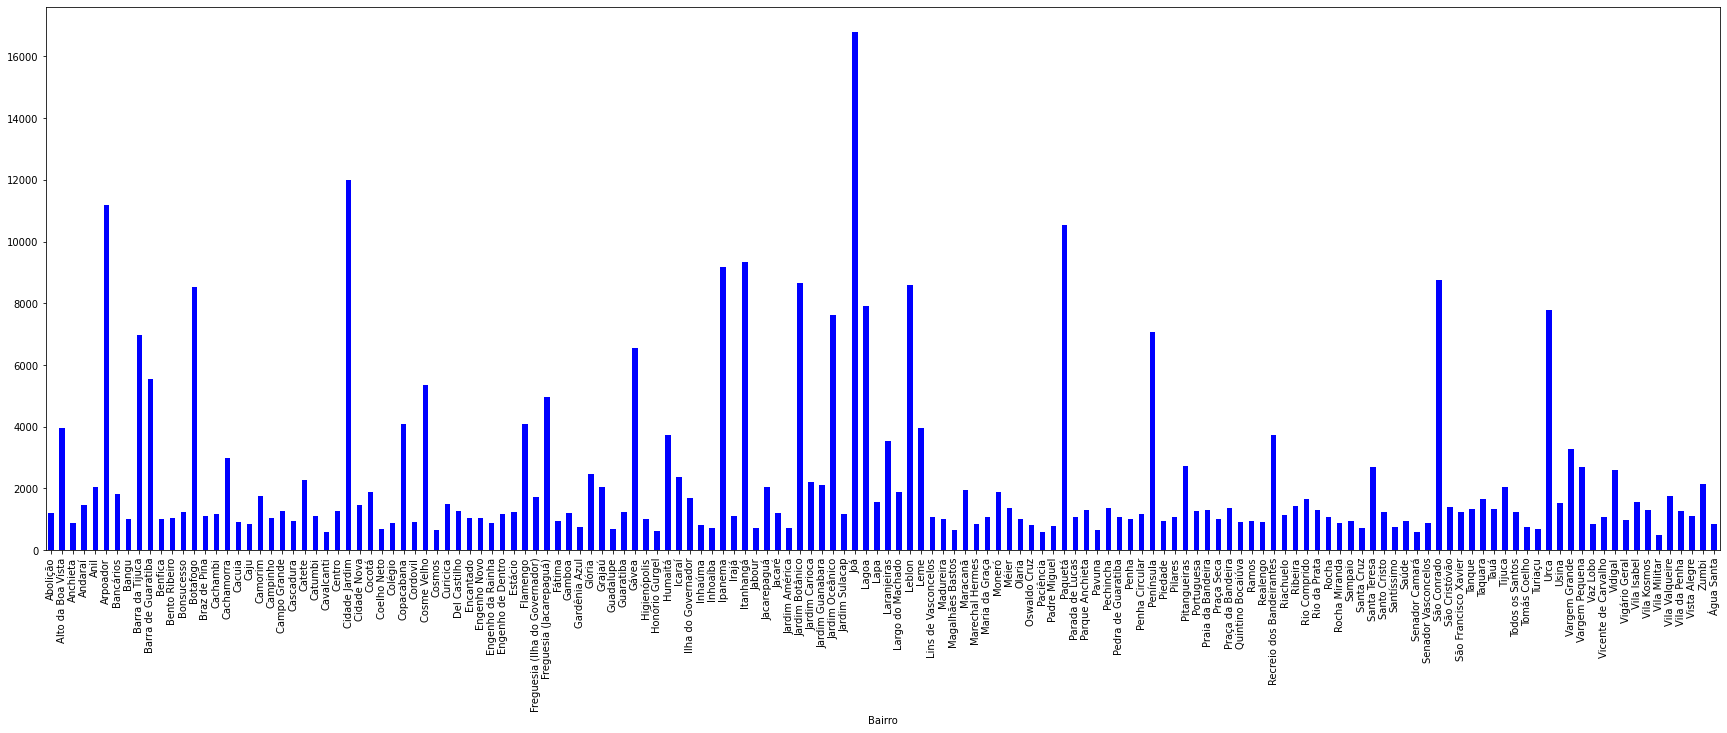

In [73]:
fig = group_neighborhoods['Valor'].std().plot.bar(color = 'blue')

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

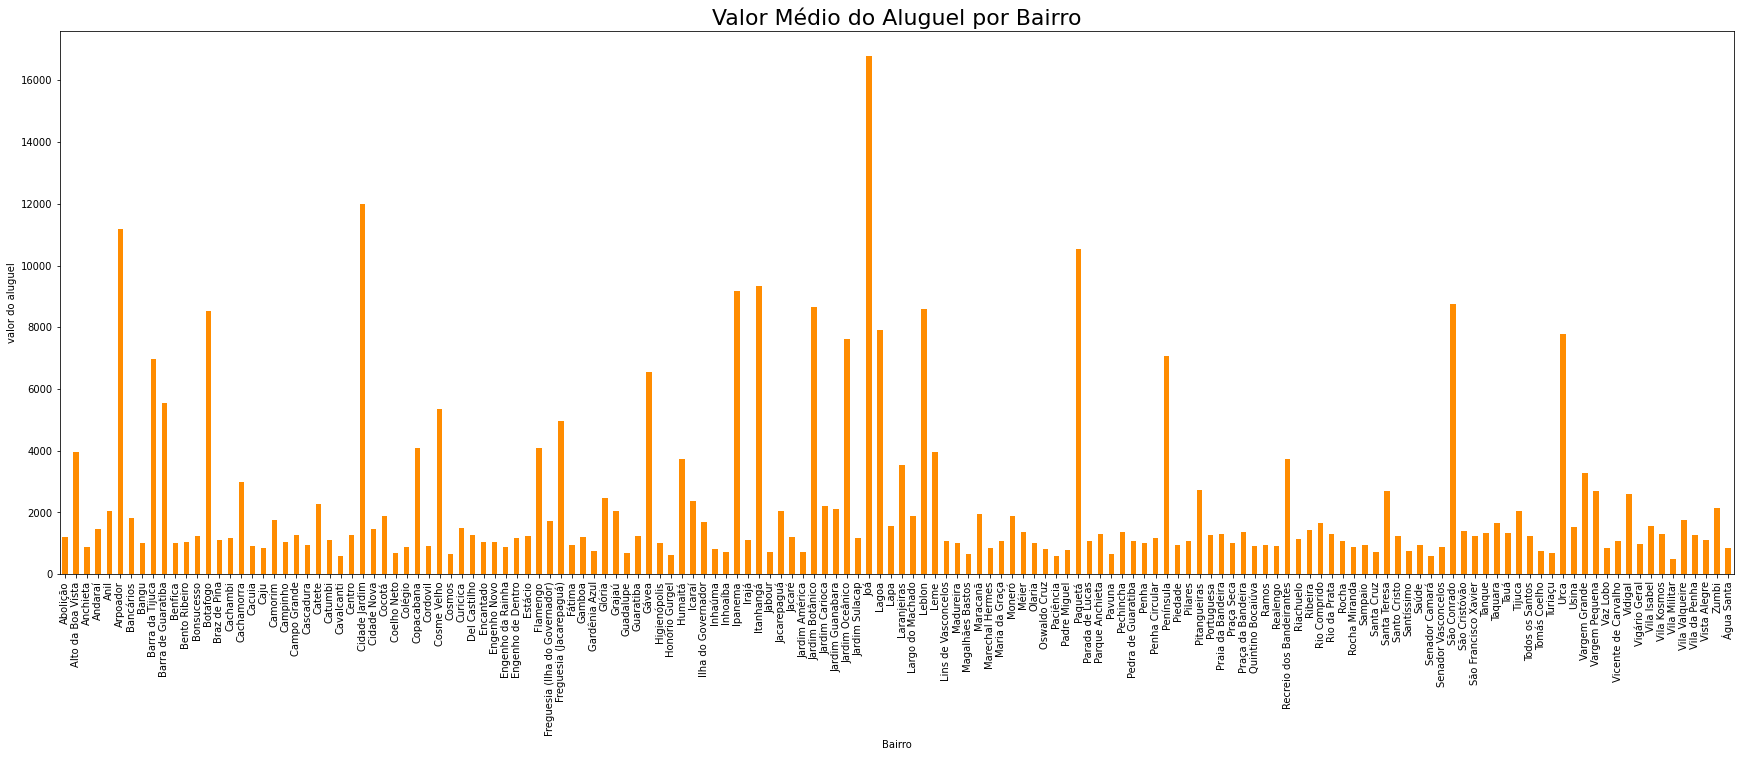

In [78]:
fig = group_neighborhoods['Valor'].mean().plot.bar(color = 'darkorange')
fig.set_ylabel('valor do aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})